# Maatriksarvutus ja lineaarvõrrandisüsteemid

In [3]:
import numpy as np
from numpy import linalg
import sympy

### Determinantide arvutamine

Arvutada neljandat järku determinant:

$\begin{bmatrix}
2 & -1 & 3 & 4 \\
-1 & 0 & -1 & 2 \\
3 & 1 & -1 & 0 \\ 
1 & 0 & 2 & -1 \\
\end{bmatrix}$

In [3]:
a = np.array([[2, -1, 3, 4],
              [-1, 0, -1, 2], 
              [3, 1, -1, 0], 
              [1, 0, 2, -1]])
linalg.det(a)

17.0

### Võrrandisüsteemide lahendamine

Lahendada võrrandisüsteem:

$\begin{cases} 
2x_{1} - 8x_{2} + 4x_{3} = 16 \\ 
3x_{1} + 3x_{2} + 5x_{3} = 4 \\ 
2x_{1} - 5x_{2} + 9x_{3} = 22 \\ 
\end{cases}$

In [5]:
a = np.array([[2, -8, 4], 
              [3, 3, 5], 
              [2, -5, 9]])
b = np.array([16, 4, 22])
linalg.solve(a, b)

array([-0.66666667, -1.20512821,  1.92307692])



Lahendada võrrandisüsteem:

$\begin{cases} 
2x_{1} - 8x_{2} + 4x_{3} = 16 \\ 
3x_{2} + 5x_{3} = 4 \\ 
2x_{1} - 5x_{2} + 9x_{3} = 22 \\ 
\end{cases}$



In [4]:
a = np.array([[2, -8, 4], 
              [0, 3, 5], 
              [2, -5, 9]])
b = np.array([16, 4, 22])
linalg.solve(a, b)

LinAlgError: Singular matrix

### Matrix inverse

Find the inverse for the matrix

$A=\begin{bmatrix}
1 & -2 & 2 \\
1 & -3 & 2 \\
1 & -5 & 5 
\end{bmatrix}$

In [19]:
a = np.array([[1, -2, 2], 
              [1, -3, 2], 
              [1, -5, 5]])
a_inv = linalg.inv(a)
np.round(a_inv, 3)

array([[ 1.667,  0.   , -0.667],
       [ 1.   , -1.   , -0.   ],
       [ 0.667, -1.   ,  0.333]])

In [18]:
np.round(a @ a_inv)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### Matrix multiplication

Lets describe raw material requirements for 4 products and 3 raw materials as a 4x3 matrix.

In [8]:
a = np.array([[3, 7, 2],
              [4, 1, 5],
              [2, 8, 4],
              [6, 9, 2]])

Lets describe the unit prices and transport costs for all three raw materials as 3x2 matrix.

In [9]:
c = np.array([[3, 8, 4],
              [3, 2, 5]])


Now we can find total raw material costs and transport costs for all four products using matrix multiplication (@ operator):

In [12]:
a @ c.transpose()

array([[73, 33],
       [40, 39],
       [86, 42],
       [98, 46]])



# Differential Calculus

We can use Symbolic Python module (manipulation of symbolic equations) for differential calculus. See __[Sympy Calculus](http://docs.sympy.org/latest/tutorial/calculus.html)__ .


Find the third derivative for the function $y = x^3 - \frac{1}{x}$

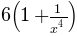

In [22]:
x, y = sympy.symbols('x y')
sympy.init_printing(use_latex=True)
sympy.diff(x**3 - 1/x, x, 3)

Let $A$ be the current value of investment, $i$ be yearly interest rate and $t$ the period in years from the present. Future value for the investment after time $t$ is calculated by the function $S(t) = Ae^{it}$. 

Calculate the function for rate of change in investments value - derivative $S'(t)$.

In [23]:
A, i, t = sympy.symbols('A i t')
sympy.diff(A*sympy.exp(i*t), t)

We want to get fixed amount of rent $R$ from our initial investment  $A$ during $T$ years. From  $S = Ae^{it}$ we get $A = Se^{-it}$. The change in present value $A(t)$ is $A'(t)=Re^{-it}$. To find desired $A$ we should solve $A = \int_{0}^{T} Re^{-it} dt$.     

In [26]:
R, T = sympy.symbols('R T')
result = sympy.integrate(R * sympy.exp(-i*t), (t, 0, T))
result


⎧    R⋅T      for i = 0
⎪                      
⎪       -T⋅i           
⎨R   R⋅ℯ               
⎪─ - ───────  otherwise
⎪i      i              
⎩                      
